In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [3]:
library = pd.read_csv('df_kaggle.csv')
library.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.817,0.669,0,-4.278,0,0.1000,0.105,0.000001,0.2470,0.693,106.934,audio_features,5gOtq0sKU24ZF8hnXlSp1V,spotify:track:5gOtq0sKU24ZF8hnXlSp1V,https://api.spotify.com/v1/tracks/5gOtq0sKU24Z...,https://api.spotify.com/v1/audio-analysis/5gOt...,181550,4
1,1,0.870,0.479,9,-7.779,1,0.1650,0.161,0.000157,0.2090,0.717,104.059,audio_features,0HaRLPnr887lcQM2YQzkff,spotify:track:0HaRLPnr887lcQM2YQzkff,https://api.spotify.com/v1/tracks/0HaRLPnr887l...,https://api.spotify.com/v1/audio-analysis/0HaR...,159124,4
2,2,0.481,0.660,6,-10.189,1,0.0761,0.350,0.000000,0.1080,0.504,111.832,audio_features,0GfCR4T6WOErZOw1557ln7,spotify:track:0GfCR4T6WOErZOw1557ln7,https://api.spotify.com/v1/tracks/0GfCR4T6WOEr...,https://api.spotify.com/v1/audio-analysis/0GfC...,159100,4
3,3,0.541,0.667,2,-7.821,1,0.1310,0.347,0.000001,0.0591,0.831,155.117,audio_features,2AKS1HhpLu2rgkojECUm3V,spotify:track:2AKS1HhpLu2rgkojECUm3V,https://api.spotify.com/v1/tracks/2AKS1HhpLu2r...,https://api.spotify.com/v1/audio-analysis/2AKS...,207475,5
4,4,0.711,0.725,3,-8.315,0,0.0941,0.424,0.129000,0.1100,0.530,105.016,audio_features,1wADwLSkYhrSmy4vdy6BRn,spotify:track:1wADwLSkYhrSmy4vdy6BRn,https://api.spotify.com/v1/tracks/1wADwLSkYhrS...,https://api.spotify.com/v1/audio-analysis/1wAD...,183057,4


In [4]:
na_cols = library.isna().sum()
na_cols

Unnamed: 0          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [4]:
duplicat = library.duplicated(keep=False)
len(duplicat)

131974

In [6]:
for row in duplicat.keys():
    if row == True:
        print(row, duplicat[row])

1 False


In [5]:
library.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,131974.00000,131974.000000,131974.000000,131974.000000,131974.000000,131974.000000,131974.00000,131974.000000,131974.000000,131974.000000,131974.000000,131974.000000,1.319740e+05,131974.000000
mean,65986.50000,0.581702,0.569975,5.234289,-9.955495,0.607317,0.11159,0.342123,0.223088,0.194599,0.441248,119.495784,2.128781e+05,3.879363
std,38097.75655,0.189779,0.259877,3.601559,6.524520,0.488349,0.12392,0.345242,0.359571,0.167387,0.259113,30.148968,1.227958e+05,0.513186
min,0.00000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.203000e+03,0.000000
25%,32993.25000,0.460000,0.397000,2.000000,-11.867000,0.000000,0.03890,0.031500,0.000000,0.097400,0.225000,96.034000,1.641600e+05,4.000000
50%,65986.50000,0.605000,0.604000,5.000000,-7.970500,1.000000,0.05580,0.203000,0.000155,0.124000,0.423000,120.023000,2.020490e+05,4.000000
75%,98979.75000,0.727000,0.776000,8.000000,-5.682000,1.000000,0.12800,0.635000,0.432000,0.236000,0.640000,139.655000,2.413470e+05,4.000000
max,131973.00000,0.996000,1.000000,11.000000,1.806000,1.000000,0.96600,0.996000,1.000000,0.999000,1.000000,249.983000,5.610020e+06,5.000000


### Feature Correlation
This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

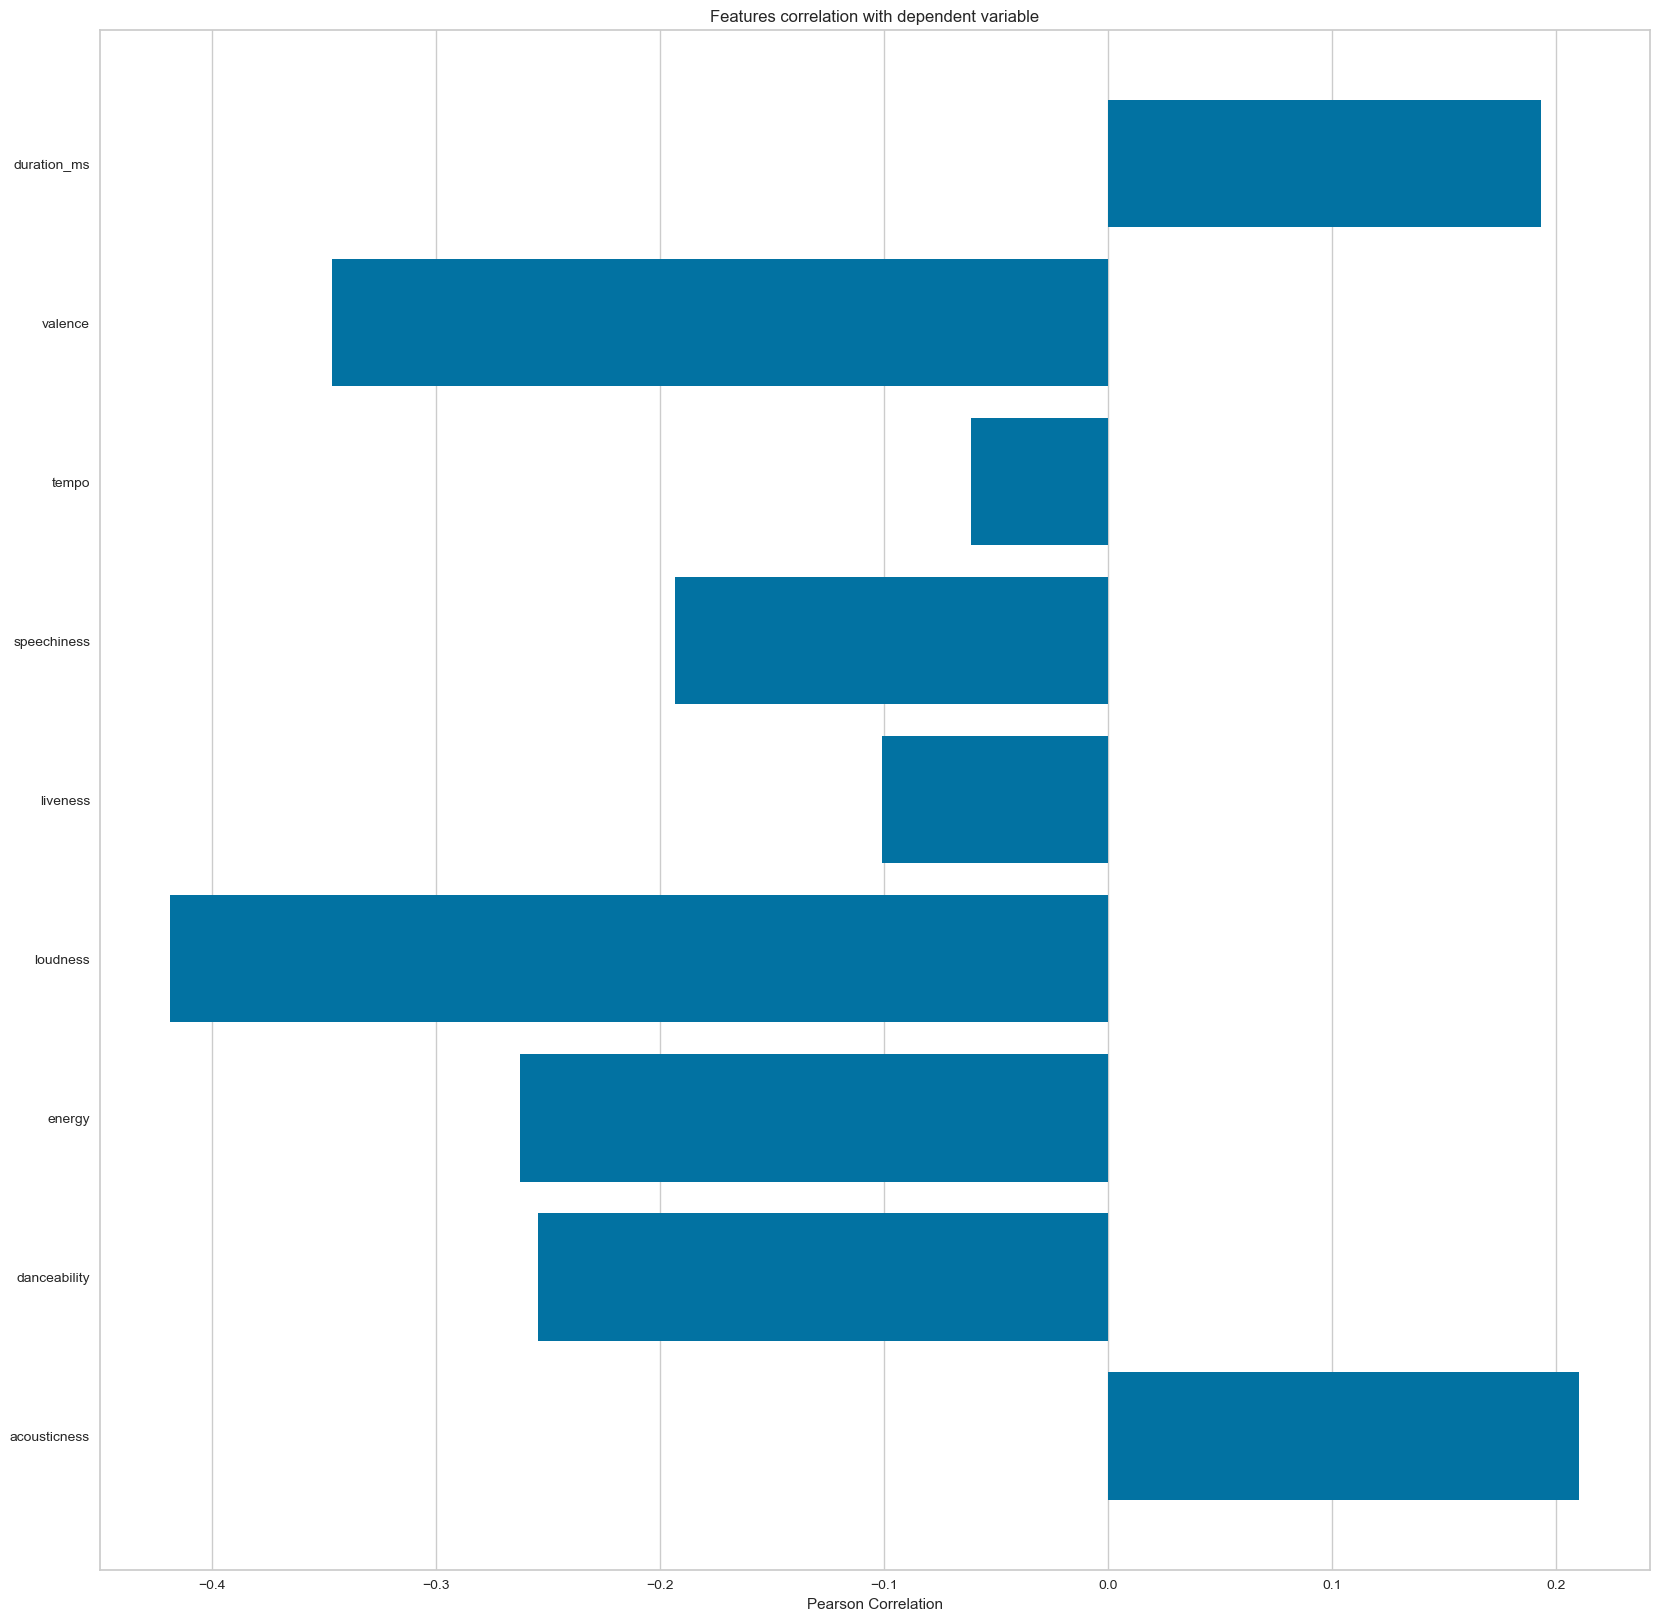

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [8]:
from yellowbrick.target import FeatureCorrelation

feature_names = [ 'acousticness','danceability', 'energy', 'loudness', 
       'liveness',  'speechiness', 'tempo', 'valence','duration_ms',]

X, y = library[feature_names], library['instrumentalness']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

# Method 1
Cluster pipeline

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=15, random_state=1234))])
X = library.select_dtypes(np.number)
cluster_pipeline.fit(X)
library['cluster'] = cluster_pipeline.predict(X)

In [13]:
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['loudness'] = library['loudness']
projection['cluster'] = library['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'loudness'])
fig.show()

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 134994 samples in 0.716s...


In [11]:
library.to_csv('library_cluster_15.csv')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.699,0.6520,-13.252,0.0446,0.04320,0.570000,0.0726,0.0358,122.011
1,0.348,0.2190,-16.132,0.0497,0.96300,0.000000,0.3470,0.3110,105.062
2,0.456,0.0292,-26.126,0.0572,0.98200,0.886000,0.0975,0.1990,99.861
3,0.375,0.9520,-6.164,0.2090,0.00645,0.000002,0.6650,0.3210,166.891
4,0.706,0.4710,-3.440,0.0834,0.09510,0.686000,0.0852,0.1360,85.950
...,...,...,...,...,...,...,...,...,...
134989,0.671,0.2560,-10.743,0.0387,0.60800,0.000000,0.0737,0.6940,115.871
134990,0.411,0.5050,-9.516,0.0308,0.70200,0.000000,0.9260,0.3030,81.970
134991,0.733,0.2990,-14.786,0.0665,0.51100,0.763000,0.2510,0.4970,83.982
134992,0.201,0.0372,-22.707,0.0447,0.94600,0.622000,0.0978,0.0746,93.521


# Method 2
k means method scatter

In [6]:
library.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
audio_features=library[['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
audio_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.817,0.669,-4.278,0.1000,0.10500,0.000001,0.2470,0.6930,106.934
1,0.870,0.479,-7.779,0.1650,0.16100,0.000157,0.2090,0.7170,104.059
2,0.481,0.660,-10.189,0.0761,0.35000,0.000000,0.1080,0.5040,111.832
3,0.541,0.667,-7.821,0.1310,0.34700,0.000001,0.0591,0.8310,155.117
4,0.711,0.725,-8.315,0.0941,0.42400,0.129000,0.1100,0.5300,105.016
...,...,...,...,...,...,...,...,...,...
131969,0.601,0.801,-5.174,0.0323,0.00678,0.000000,0.0991,0.2890,131.049
131970,0.387,0.249,-13.233,0.0437,0.91800,0.000000,0.1030,0.3460,94.039
131971,0.717,0.532,-8.351,0.2060,0.33000,0.000000,0.0997,0.5460,156.977
131972,0.772,0.510,-9.670,0.1200,0.00790,0.000000,0.1310,0.0755,120.049


In [8]:
scaler = StandardScaler()
scaler.fit(audio_features)
audio_features_scaled = scaler.transform(audio_features)
len(audio_features_scaled)

131974

In [9]:
with open("Model_final/scaler_9_kaggle.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(scaler,f)


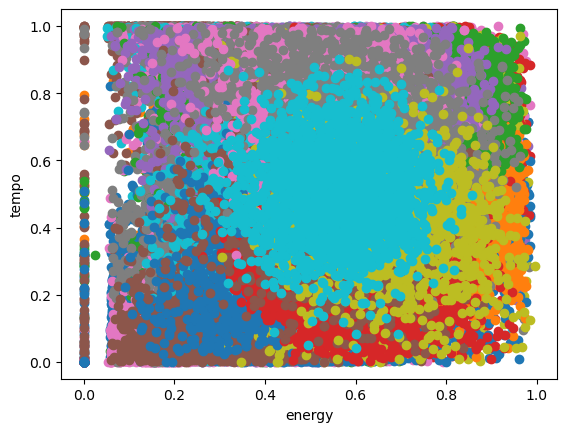

In [10]:
kmeans = KMeans(n_clusters=50, random_state=1234)
kmeans.fit(audio_features_scaled)
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(audio_features.to_numpy()[row_ix, 0], audio_features.to_numpy()[row_ix,1])
    pyplot.xlabel("energy")
    pyplot.ylabel("tempo")
    # show the plot
pyplot.show()

In [43]:
with open("Model_final/kmeans11_first_of130k.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [11]:
with open("Model_final/kmeans50_9features_ofkaggle.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [12]:
clusters = kmeans.predict(audio_features_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index() #finding frequency

0     4267
1     3238
2     3000
3     1808
4     2600
5      743
6     3282
7      648
8     3829
9     2622
10    3309
11    3414
12    3064
13    3464
14    3606
15    2426
16    2736
17    1612
18    2379
19    1669
20    1888
21    1476
22    3461
23    3318
24    1408
25    2157
26    2916
27    2305
28     356
29    2177
30    2028
31    4834
32    1149
33    3176
34    2882
35    4737
36    3586
37    1518
38    3443
39    3922
40    1084
41    2114
42    5283
43    2515
44    5502
45    1298
46    2187
47    1650
48    1511
49    2377
dtype: int64

In [10]:
library['clusters'] = clusters
library.to_csv('library_cluster_50_kaggle_9featur.csv')

In [11]:
library['clusters']

0          0
1         28
2         59
3         20
4          0
          ..
134989    51
134990    62
134991    27
134992    19
134993    28
Name: clusters, Length: 134994, dtype: int32

# 6. Build The Elbow graph to find the best K

In [12]:
K = range(80, 120) 
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k')

Training a K-Means model with 80 clusters! 

Training a K-Means model with 81 clusters! 

Training a K-Means model with 82 clusters! 



KeyboardInterrupt: 

In [22]:
with open("Model/elbow_130k_clust15.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(kmeans,f)

# Silhoutte method

In [24]:
K = range(15, 30)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled, kmeans.predict(audio_features_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

KeyboardInterrupt: 

In [39]:
n_clusters

NameError: name 'n_clusters' is not defined

In [41]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(library[feature_cols])

print(normalized_df[:2])

[[1.10560314e-01 7.51666667e-01 2.14245470e-01 6.04681404e-01
  1.42207053e-06 0.00000000e+00 3.68403132e-01 7.82302036e-01
  0.00000000e+00 1.68680522e-01 3.87297104e-01 5.00000000e-01
  6.73420739e-01]
 [1.71976618e-01 8.40000000e-01 1.55202645e-01 3.57607282e-01
  1.78612059e-04 8.18181818e-01 3.03711270e-01 6.07173228e-01
  1.00000000e+00 3.25761237e-01 3.68756731e-01 5.00000000e-01
  7.02026222e-01]]


In [16]:
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [17]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(library.index, index=library['id']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[indices['1yOt3NUFWpYbnFW6ISj59h']]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=library['song_id'].iloc[top_songs_index]
    return top_songs

NameError: name 'normalized_df' is not defined

In [50]:
print("Recommended Songs:")
print(generate_recommendation('1yOt3NUFWpYbnFW6ISj59h',cosine).values)

Recommended Songs:


KeyError: '2SiXAy7TuUkycRVbbWDEpo'

In [49]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('2SiXAy7TuUkycRVbbWDEpo',sig_kernel).values)

Recommended Songs:


KeyError: '2SiXAy7TuUkycRVbbWDEpo'